In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn import preprocessing 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVR, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import Imputer

#import xgboost as xgb
from functools import reduce
from imblearn.over_sampling import SMOTE
import itertools
import copy
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [70]:
df0 = pd.read_csv('Diabetes Project Part 1.csv')

In [71]:
# set SEQN to index of the df0
df0.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df0 = df0[~df0.index.duplicated(keep='first')] 

df = df0.copy(deep=True)
print(df.columns.values)
df.head()

['12drinksayear' '5drinks2hours' '5drinksaday' 'BMI' 'LDL' 'age'
 'diabetes' 'fasting_glucose' 'gender' 'race' 'sitting' 'sleeping' 'sugar'
 'sysBP' 'diaBP']


,12drinksayear,5drinks2hours,5drinksaday,BMI,LDL,age,diabetes,fasting_glucose,gender,race,sitting,sleeping,sugar,sysBP,diaBP
ID,,,,,,,,,,,,,,,
83733.0,1.0,0.0,1.0,30.8,3.0,53.0,0.0,5.59,1.0,3.0,5.000000,8.000000,0.750,140.000000,86.000000
83734.0,1.0,0.0,1.0,28.8,2.0,78.0,1.0,4.66,1.0,3.0,8.000000,7.000000,1.600,135.333333,45.333333
83736.0,0.0,0.0,0.0,20.3,2.0,42.0,0.0,4.66,2.0,4.0,9.000000,7.718424,2.750,104.000000,60.000000
83737.0,0.0,0.0,0.0,28.6,2.0,72.0,0.0,5.93,2.0,1.0,0.166667,9.000000,0.070,119.333333,58.666667
83741.0,1.0,0.0,1.0,28.0,2.0,22.0,0.0,5.27,1.0,4.0,9.000000,6.500000,1.085,111.333333,72.666667


In [72]:
numerical_variables = ['5drinks2hours', 'BMI','age','fasting_glucose', 'sitting', 'sleeping', 'sugar', 'sysBP', 'diaBP']
categorical_variables = ['12drinksayear', '5drinksaday', 'LDL', 'diabetes', 'race', 'gender']

# Feature selection

* initial screening
    #### 1. Filter Method 
    * filter and take only the subset of the relevant features. The model is built after selecting the features
    * commonly done using Pearson correlation.
    * Filter method is less accurate. 
    * It is great while doing EDA, it can also be used for checking multi co-linearity in data.
    
    
    
    
* during model training
    * see part 3 for this
    * more accurate results 
    * computationally expensive - recursive
    * when number of features < 20
        #### 2. Wrapper Method 
        * A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. 
        * more accurate than the filter method
    
    #### 3. Embedded Method 
        * Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
        * Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

# Numerical Variables

### 1. Normalization: Scale numerical variables

In [73]:
def scaler(df,feature):
    X = np.array(df[feature])
    X = preprocessing.scale(X)
    df[feature] = X
    return df

In [74]:
df = scaler(df,'5drinks2hours')
df = scaler(df,'BMI')
df = scaler(df,'age')
df = scaler(df,'fasting_glucose')
df = scaler(df,'sitting')
df = scaler(df,'sleeping')
df = scaler(df,'sugar')
df = scaler(df,'sysBP')
df = scaler(df,'diaBP')

Now compare before scaling and after scaling: 

In [75]:
for feature in numerical_variables:
    print('Before scaling:')
    print(df0[feature].describe())
    print('After scaling:')
    print(df[feature].describe())
    print('-------------------------')    

Before scaling:
count    2600.000000
mean        0.203846
std         1.399439
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: 5drinks2hours, dtype: float64
After scaling:
count    2.600000e+03
mean     6.410470e-16
std      1.000192e+00
min     -1.456907e-01
25%     -1.456907e-01
50%     -1.456907e-01
75%     -1.456907e-01
max      1.414849e+01
Name: 5drinks2hours, dtype: float64
-------------------------
Before scaling:
count    2600.000000
mean       29.215271
std         6.930430
min        15.100000
25%        24.300000
50%        28.200000
75%        32.900000
max        64.500000
Name: BMI, dtype: float64
After scaling:
count    2.600000e+03
mean    -1.253484e-16
std      1.000192e+00
min     -2.037101e+00
25%     -7.093667e-01
50%     -1.465229e-01
75%      5.317761e-01
max      5.092255e+00
Name: BMI, dtype: float64
-------------------------
Before scaling:
count    2600.000000
mean       48.601538
std        18.47

In [76]:
df0[numerical_variables].head()

,5drinks2hours,BMI,age,fasting_glucose,sitting,sleeping,sugar,sysBP,diaBP
ID,,,,,,,,,
83733.0,0.0,30.8,53.0,5.59,5.000000,8.000000,0.750,140.000000,86.000000
83734.0,0.0,28.8,78.0,4.66,8.000000,7.000000,1.600,135.333333,45.333333
83736.0,0.0,20.3,42.0,4.66,9.000000,7.718424,2.750,104.000000,60.000000
83737.0,0.0,28.6,72.0,5.93,0.166667,9.000000,0.070,119.333333,58.666667
83741.0,0.0,28.0,22.0,5.27,9.000000,6.500000,1.085,111.333333,72.666667


In [77]:
df[numerical_variables].head()

,5drinks2hours,BMI,age,fasting_glucose,sitting,sleeping,sugar,sysBP,diaBP
ID,,,,,,,,,
83733.0,-0.145691,0.228706,0.238124,-0.305181,-0.346925,1.779442e-01,-0.760872,0.861028,1.443065
83734.0,-0.145691,-0.059931,1.591575,-0.722354,0.545482,-4.540141e-01,-0.188146,0.598762,-1.928683
83736.0,-0.145691,-1.286642,-0.357394,-0.722354,0.842950,-1.122584e-15,0.586719,-1.162165,-0.712643
83737.0,-0.145691,-0.088795,1.266747,-0.152666,-1.784690,8.099026e-01,-1.219053,-0.300435,-0.823192
83741.0,-0.145691,-0.175387,-1.440155,-0.448724,0.842950,-7.699933e-01,-0.535150,-0.750033,0.337574


### 2. Check redundancy: Correlations between variables

* Numerical variables

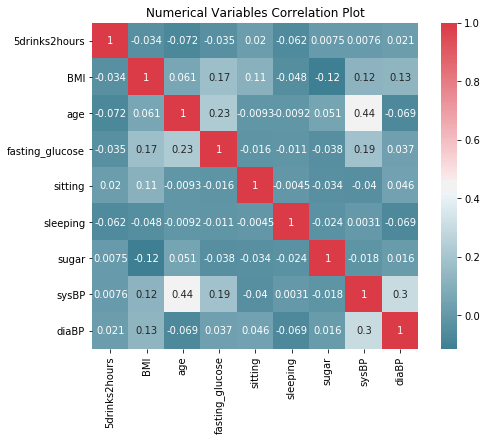

In [78]:
corr_df = df[numerical_variables]
cor = corr_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Numerical Variables Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

* The correlation coefficient has values between -1 to 1
        — A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
        — A value closer to 1 implies stronger positive correlation
        — A value closer to -1 implies stronger negative correlation
There's no strong correlation between any two variables. The strongest correlation is between sysBP and age features (0.44). Keep all the features as there is no strong evidence of data redundancy for now.

In [79]:
# NOT USED YET
# compare the correlation between features and remove one of two features that have a correlation higher than 0.9
# Now, the dataset has only those columns with correlation less than 0.9

def reduce_highly_correlated_features():
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False
    selected_columns = data.columns[columns]
    data = data[selected_columns]

* check correlation between each feature and the target y
    * ideally we want to only keep features that are highly correlated to y. However, by setting the correlation coefficient to 0.5, the only feature that passes is fasting_glucose. 

In [95]:
correlation_coefficient = 0.3
def feature_target_correlation(threshold):
    cor = df.corr()
    cor_target = abs(cor['diabetes'])
    relevant_features = cor_target[cor_target>threshold]
    return relevant_features

feature_target_correlation(correlation_coefficient)

age                0.305881
diabetes           1.000000
fasting_glucose    0.543394
Name: diabetes, dtype: float64

### 3. Visualization for numerical variables

In [80]:
def numerical_variables_visualization():
    fig = plt.figure(figsize = (15, 30))

    j = 0
    h = len(numerical_variables)
    for i in numerical_variables:
        plt.subplot(h, 1, j+1)
        j += 1
        # original data
        sns.distplot(df0[i][df0['diabetes']==0], color='g', label = 'Healthy_before')
        sns.distplot(df0[i][df0['diabetes']==1], color='r', label = 'Diabetes_before')
        # after normalization
        sns.distplot(df[i][df['diabetes']==0], color='b', label = 'Healthy_after')
        sns.distplot(df[i][df['diabetes']==1], color='m', label = 'Diabetes_after')
        plt.legend(loc='best')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

# numerical_variables_visualization()

# Categorical Variables

In [81]:
df[categorical_variables].head()

,12drinksayear,5drinksaday,LDL,diabetes,race,gender
ID,,,,,,
83733.0,1.0,1.0,3.0,0.0,3.0,1.0
83734.0,1.0,1.0,2.0,1.0,3.0,1.0
83736.0,0.0,0.0,2.0,0.0,4.0,2.0
83737.0,0.0,0.0,2.0,0.0,1.0,2.0
83741.0,1.0,1.0,2.0,0.0,4.0,1.0


### 1. Encoding

* Label encoding: LDL

* One hot encoding: Problem with label encoding is that it assumes higher the categorical value, better the category. This is why we use one hot encoder to perform “binarization” of the category and include it as a feature to train the model.

In [82]:
def one_hot_encoding(df,col_name,dummies_name):
    dummy = pd.get_dummies(df[col_name])
    dummy.columns = dummies_name
    df = pd.merge(df, dummy, on = 'ID', left_index = True, sort = False)
    df = df.drop([col_name],axis=1)
    return df

In [83]:
df = one_hot_encoding(df,'gender',['male','female'])
df = one_hot_encoding(df,'LDL',['Low LDL','Intermediate LDL','High LDL'])
df = one_hot_encoding(df,'race',['Mexican American','Other Hispanic','Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian','Other/Multi-racial'])

### 2. Check relationship with y: chi-square test

In [84]:
y = df['diabetes']
categorical_variables = ['male','female','Low LDL','Intermediate LDL','High LDL','Mexican American','Other Hispanic','Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian','Other/Multi-racial']
for categorical_variable in categorical_variables:
    csq = chi2_contingency(pd.crosstab(y, df[categorical_variable]))
    p_value = csq[1]
    if p_value>0.05: 
        print(categorical_variable)
        print("P-value: ", p_value)
    else: pass

High LDL
P-value:  0.12451217452447005
Other Hispanic
P-value:  0.5945052967598577
Other/Multi-racial
P-value:  0.5257870254854387


* interpretation: P values > 0.05 - High LDL, other hispanic, multiracial are independent of diabetes (no correlation with y, provide no information regarding y)

#### Assign datatypes

In [85]:
for categorical_variable in categorical_variables:
    df[categorical_variable] = df[categorical_variable].astype('category')

# Feature selection CONT.

* Select based on correlations (see above)
* Select based on p values. If the pvalue is above 0.05 then we remove the feature

In [86]:
# 待完成：sm是statsmodel里的，需要在sklearn里找pvalue相对应的部分

def Backward Elimination():
    import statsmodels.api as sm

    feature_list = list(X_names)
    pmax = 1
    while (len(feature_list)>0):
        p= []
        X_1 = X[feature_list]
        X_1 = sm.add_constant(X_1)
        model = sm.clf(y,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = feature_list)      
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            print('')
            feature_list.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = feature_list
    print(selected_features_BE)

In [ ]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

def recursive_feature_elimination():
    l = len(X_names)
    feature_num_list=np.arange(1,l)            
    high_score=0
    feature_num=0 # optimal number of feature       
    score_list =[]
    for n in range(len(feature_num_list)):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
        clf = LinearRegression()
        rfe = RFE(clf,feature_num_list[n])
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        clf.fit(X_train_rfe,y_train)
        score = clf.score(X_test_rfe,y_test)
        score_list.append(score)
        if(score>high_score):
            high_score = score
            feature_num = feature_num_list[n]
    print("Optimum number of features: %d" %feature_num)
    print("Accuracy with %d features: %f" % (feature_num, high_score))
    
    # feed optimal feature num into clf 
    cols = list(X_names)
    clf = LinearRegression()
    rfe = RFE(clf, feature_num)             
    X_rfe = rfe.fit_transform(X,y)  

    clf.fit(X_rfe,y)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features_rfe = temp[temp==True].index
    print(selected_features_rfe)

Best alpha using built-in LassoCV: 0.000901
Best score using built-in LassoCV: 0.364119
Lasso picked 17 variables and eliminated the other 5 variables

The eliminated features are:
sysBP                 0.0
Intermediate LDL     -0.0
Mexican American      0.0
Non-Hispanic Asian    0.0
Other/Multi-racial   -0.0
dtype: float64


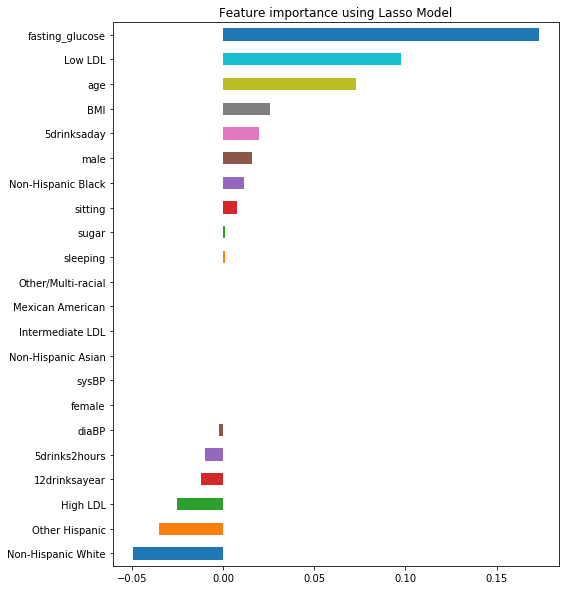

In [104]:
def lasso():
    X = df.drop('diabetes',1)
    y = df['diabetes']
    
    reg = LassoCV()
    reg.fit(X, y)
    coef = pd.Series(reg.coef_, index = X.columns)
    imp_coef = coef.sort_values()
    
    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X,y))
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")   
    print()
    print('The eliminated features are:')
    print(coef[reg.coef_==0])
    
    plt.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    
lasso()

# Visualization

# Export

In [87]:
df.head(10)

,12drinksayear,5drinks2hours,5drinksaday,BMI,age,diabetes,fasting_glucose,sitting,sleeping,sugar,...,female,Low LDL,Intermediate LDL,High LDL,Mexican American,Other Hispanic,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic Asian,Other/Multi-racial
ID,,,,,,,,,,,,,,,,,,,,,
83733.0,1.0,-0.145691,1.0,0.228706,0.238124,0.0,-0.305181,-0.346925,1.779442e-01,-0.760872,...,0,0,0,1,0,0,1,0,0,0
83734.0,1.0,-0.145691,1.0,-0.059931,1.591575,1.0,-0.722354,0.545482,-4.540141e-01,-0.188146,...,0,0,1,0,0,0,1,0,0,0
83736.0,0.0,-0.145691,0.0,-1.286642,-0.357394,0.0,-0.722354,0.842950,-1.122584e-15,0.586719,...,1,0,1,0,0,0,0,1,0,0
83737.0,0.0,-0.145691,0.0,-0.088795,1.266747,0.0,-0.152666,-1.784690,8.099026e-01,-1.219053,...,1,0,1,0,1,0,0,0,0,0
83741.0,1.0,-0.145691,1.0,-0.175387,-1.440155,0.0,-0.448724,0.842950,-7.699933e-01,-0.535150,...,0,0,1,0,0,0,0,1,0,0
83743.0,1.0,-0.145691,0.0,-0.435161,-1.656707,0.0,-0.399381,2.925231,-7.699933e-01,0.755168,...,0,1,0,0,0,0,0,0,1,0
83750.0,1.0,-0.145691,0.0,-0.738231,-0.194980,0.0,-0.713382,-0.346925,1.779442e-01,1.708589,...,0,0,1,0,0,0,0,0,0,1
83754.0,0.0,-0.145691,0.0,2.090421,0.996057,0.0,0.434965,-0.049456,1.125882e+00,-0.996700,...,1,1,0,0,0,1,0,0,0,0
83755.0,1.0,-0.145691,0.0,-0.059931,0.996057,1.0,4.274750,-0.941862,-4.540141e-01,-0.558733,...,0,0,1,0,0,0,0,1,0,0


In [88]:
df.to_csv('Diabetes Project Part 2.csv',index=False,sep=',')